In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.random.seed(11)

In [2]:
# this funtion was prepared for loading raw data from mobile build-in tools, but the models' scores were really low 
# (svc max. 0.67), and without signal preprocessing it wouldn't be better
def importing_function(path, components):
    # downloading files from both directories
    result_X = [None] * components
    df_train = pd.read_csv('UCI HAR Dataset/train/Inertial Signals/body' + path + 'train.txt', header=None, delim_whitespace=True)
    df_test  = pd.read_csv('UCI HAR Dataset/test/Inertial Signals/body' + path + 'test.txt', header=None, delim_whitespace=True)
    
    # combined set, that would be usefull for output
    df = pd.concat([df_train, df_test], ignore_index=True)
    del df_train, df_test
    
    # preprocesing of the data with use of most common tool
    df = StandardScaler().fit_transform(df)
    
    # demensionality reduction from 128 to just 'components' number
    pca = PCA(n_components=components, svd_solver='full')
    result = pca.fit_transform(df)
    del df
    
    # returning data frame
    return pd.DataFrame(result, columns = [path + str(i) for i in range(components)])

In [3]:
# creation of combined sets, that would be usefull in cross validation
# number of new dimentions
n_dim = 24

"""
X = pd.DataFrame()
paths = ['_acc_x_', '_acc_y_', '_acc_z_', '_gyro_x_', '_gyro_y_', '_gyro_z_']

for path in paths:
    # 2 is number of final reduced dimentions
    X = pd.concat([X, importing_function(path, n_dim)], axis=1)
"""

X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)
X_test  = pd.read_csv('UCI HAR Dataset/test/X_test.txt', header=None, delim_whitespace=True)
X       = pd.concat([X_train, X_test], ignore_index=True)

# demensionality reduction from 128 to just 'components' number
pca = PCA(n_components=n_dim, svd_solver='full')
X   = pd.DataFrame(pca.fit_transform(X), columns = [str(i) for i in range(n_dim)])

# files with labels
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)
y_test  = pd.read_csv('UCI HAR Dataset/test/y_test.txt', header=None, delim_whitespace=True)
y       = pd.concat([y_train, y_test], ignore_index=True)
del X_train, X_test, y_train, y_test

In [4]:
# checking out for silly data
print(X.isnull().sum())

# dropping the hypotethical Null data and checking out if header looks rigth
X.dropna().reset_index(drop=True)
X.head(10)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-5.537858,-0.716345,-1.412546,1.733302,-0.920246,-0.467883,0.196259,0.845865,-1.324194,-0.181811,...,1.544357,0.459419,-0.065329,0.481076,-0.981489,0.081026,0.320152,-0.630417,-0.501062,0.175302
1,-5.564174,-0.579506,-1.827912,0.796021,-0.626565,0.991651,0.065073,-0.758446,-0.944750,0.570210,...,0.336391,0.183626,0.153494,-0.529502,0.018874,0.064098,0.223977,0.593856,0.037403,-0.034250
2,-5.499319,-0.297684,-2.148152,0.604225,-0.005493,-0.026151,0.018304,0.084837,-0.219448,0.216676,...,0.237765,0.112459,-0.219936,-0.595661,-0.353262,-0.082028,0.363106,0.908512,-0.083323,-0.182899
3,-5.700396,0.354586,-2.149211,0.328516,-0.791819,0.898207,0.690719,-0.469168,0.390371,-0.247483,...,-0.063136,0.117459,-0.031990,0.360444,0.128708,-0.239865,-0.175222,0.082740,0.177958,0.402710
4,-5.769082,0.559389,-2.365302,0.333767,-0.448452,0.328038,0.252560,-0.044749,0.424875,-0.254294,...,0.258879,0.233115,0.055497,0.019084,0.969476,-0.372442,-0.081743,0.073519,0.007511,0.294610
5,-5.730864,0.779821,-2.284947,0.084010,-0.041737,-0.006316,-0.057977,-0.284710,0.446435,0.038032,...,0.142303,0.279276,-0.192976,0.055474,0.718655,-0.055525,-0.285251,0.082496,-0.667398,0.264157
6,-5.431523,-0.004750,-2.187001,0.390556,0.079585,-0.908361,-0.082015,0.625646,-0.118056,0.161679,...,0.102483,0.144338,-0.052342,-0.096469,0.570711,0.147072,-0.278293,-0.148768,0.119346,0.133717
7,-5.573294,-0.434543,-1.772288,0.774548,-0.895087,0.990197,0.484576,-0.081220,-0.865005,0.444919,...,-0.175720,0.221256,0.080594,-0.607418,0.132989,-0.542687,0.245599,0.336402,0.427212,0.338428
8,-5.675012,-0.145342,-1.979918,0.985468,-0.434532,-0.226271,-0.015370,0.753192,-0.874502,-0.025776,...,0.120269,0.192099,-0.131101,-0.211236,0.117763,-0.062730,0.307168,0.229526,0.186037,-0.042910
9,-5.174861,0.074819,-1.784585,-0.638988,0.499787,0.026450,-0.550880,0.313571,0.484301,0.749257,...,-0.234824,-0.016918,0.736870,0.112029,0.218252,0.424192,-0.125637,-0.545061,-0.584406,0.019405


In [5]:
# shapes of datasets
print('X shape:', X.shape)
print('y shape:', y.shape)
X.describe()

X shape: (10299, 24)
y shape: (10299, 1)


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,...,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04,1.029900e+04
mean,-3.121431e-16,3.272781e-17,9.976808e-18,1.785045e-16,3.622050e-18,1.203415e-16,1.914512e-17,6.166379e-17,4.595476e-17,1.840131e-17,...,-4.927497e-17,-5.284312e-17,1.350938e-16,2.773941e-17,2.103430e-17,-9.852839e-18,1.142563e-16,-4.578767e-17,-3.827946e-17,1.007464e-16
std,5.809166e+00,1.608798e+00,1.476180e+00,9.943542e-01,9.347122e-01,8.073169e-01,8.023245e-01,7.639730e-01,7.218214e-01,6.936150e-01,...,5.320353e-01,5.256265e-01,5.057871e-01,4.925637e-01,4.849291e-01,4.732378e-01,4.714300e-01,4.590712e-01,4.453552e-01,4.373971e-01
min,-6.673451e+00,-5.530574e+00,-3.051449e+00,-2.902947e+00,-3.959463e+00,-2.750034e+00,-2.417162e+00,-2.529572e+00,-2.339054e+00,-2.431321e+00,...,-2.523275e+00,-1.996885e+00,-2.665964e+00,-1.848198e+00,-2.015577e+00,-1.833619e+00,-1.711886e+00,-1.982696e+00,-1.875242e+00,-1.685579e+00
25%,-5.531646e+00,-1.163701e+00,-1.023221e+00,-6.370842e-01,-5.479408e-01,-5.670439e-01,-5.543851e-01,-5.553936e-01,-4.916681e-01,-4.628891e-01,...,-3.386129e-01,-3.054813e-01,-3.088612e-01,-3.293524e-01,-3.124572e-01,-2.984292e-01,-3.073279e-01,-3.122101e-01,-2.977377e-01,-2.861223e-01
50%,-3.154740e+00,-1.760882e-03,-1.997071e-01,2.313437e-02,1.893508e-02,5.618071e-02,-4.797042e-02,-5.399381e-02,-1.570512e-02,1.962561e-03,...,-5.167967e-03,-1.358131e-02,7.238255e-03,3.304583e-03,-1.078672e-03,3.419460e-03,-1.029992e-02,-1.268227e-02,-1.116575e-02,-6.129882e-03
75%,5.513878e+00,1.092174e+00,7.516325e-01,6.012180e-01,5.389507e-01,5.875870e-01,5.006623e-01,5.207526e-01,4.706395e-01,4.587007e-01,...,3.323324e-01,2.959999e-01,2.970176e-01,3.331034e-01,3.147223e-01,3.107160e-01,2.900639e-01,2.989656e-01,2.848941e-01,2.793469e-01
max,1.909714e+01,8.771340e+00,6.475081e+00,7.193847e+00,5.522353e+00,3.221194e+00,4.061515e+00,3.836865e+00,2.761131e+00,2.489508e+00,...,3.706610e+00,2.432658e+00,3.120589e+00,1.849801e+00,2.155205e+00,1.914223e+00,2.303396e+00,2.173486e+00,1.947923e+00,1.801727e+00


In [6]:
# function prepared for n_dim dimentions
def plotting_function(X, y, plot_range, n_dim):
    plt.figure()
    %matplotlib inline
    
    # the total number of plots
    n, off = X.shape[1]/n_dim + 1, 1
    
    # for accelerometr
    for i in range(0,int(X.shape[1]/2), n_dim):
        plt.subplot(n, 1, off)
        
        for j in range(n_dim):
            plt.plot(X.iloc[:plot_range,i+j], alpha=0.7)
        plt.title(str(off), y=0, loc='left')
        off += 1
    
    # for gyroscope
    for i in range(int(X.shape[1]/2), int(X.shape[1]), n_dim):
        plt.subplot(n, 1, off)
        
        for j in range(n_dim):
            plt.plot(X.iloc[:plot_range,i+j], alpha=0.7)
        plt.title(str(off), y=0, loc='left')
        off += 1
    
    # for labels
    plt.subplot(n, 1, off)
    plt.plot(y.iloc[:plot_range,0])
    plt.title('labels', y=0, loc='left')

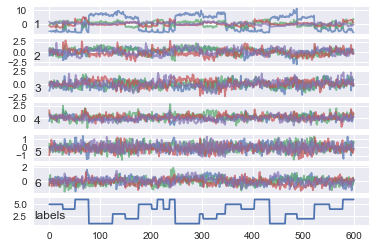

In [7]:
plotting_function(X, y, 600, int(n_dim/6)) # 18/6 = 3

In [8]:
import time
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [9]:
def grid_searcher(X, y, pipe, parameters):
    # results table
    model_tab = [None] * len(parameters)
    
    for i, elem in enumerate(parameters):
        # creation of grid search object
        # cv is a number of spitted data' parts
        clf = GridSearchCV(pipe, elem, cv=5, n_jobs=-1)
        
        # fitting the grid search model and creation od new usefull model
        model_tab[i] = clf.fit(X, y)
    
    return model_tab

In [10]:
# classifier
svc = SVC()

pipe = Pipeline(steps=[('scaler', StandardScaler()), ('svc', svc)])

# chosing best detection margin's parameter
C = np.logspace(-1, 2, 12)

# kernel coefficient for ‘rbf’, ‘poly’
gamma = np.logspace(-2, 3, 6)

parameters = [dict(svc__kernel = ['linear'], svc__C = C),
              dict(svc__kernel = ['rbf'],  svc__C = C, svc__gamma = gamma)]
            # I didn't use 'polygon' kernel, because my computer can not cope with it

In [11]:
# table of svc models
model_tab = grid_searcher(X, y, pipe, parameters)
# I leave warnings send by jupyter, because of usefulness of visible information

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [12]:
for i in range(len(model_tab)):
    print("Kelner:", model_tab[i].best_estimator_.get_params()['svc__kernel'])
    print("Best C value:", model_tab[i].best_estimator_.get_params()['svc__C'])
    print("Best gamma value:", model_tab[i].best_estimator_.get_params()['svc__gamma'])
    print("Best score:", model_tab[i].best_score_, '\n')

Kelner: linear
Best C value: 0.3511191734215131
Best gamma value: scale
Best score: 0.9032915874894496 

Kelner: rbf
Best C value: 15.199110829529332
Best gamma value: 0.01
Best score: 0.9144572490180453 



In [13]:
def random_searcher(X, y, pipe, parameters):
    # results table
    model_tab = [None] * len(parameters)
    
    for i, elem in enumerate(parameters):
        # creation of grid search object
        # cv is a number of spitted data' parts
        clf = RandomizedSearchCV(pipe, elem, cv=5, n_jobs=-1)
        
        # fitting the grid search model and creation od new usefull model
        model_tab[i] = clf.fit(X, y)
    
    return model_tab

In [14]:
# logistic regression classifier
logistic = LogisticRegression()

# pipeline
pipe = Pipeline([('preprocess', StandardScaler()), ('logistic', logistic)])

# regularization hyperparameter distribution using uniform distribution
C = np.logspace(-1, 4, 20)

# regularization of penalty space and choosen algorithms below in prepared table
LRparameters = [dict(logistic__penalty=['l1'], logistic__C=C, logistic__solver=['liblinear', 'saga' ]),
                dict(logistic__penalty=['l2'], logistic__C=C, logistic__solver=['newton-cg', 'lbfgs', 'sag', 'saga'])]

In [15]:
# table of lr models
LRmodel_tab = random_searcher(X, y, pipe, LRparameters)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [16]:
for i in range(len(LRmodel_tab)):
    print("Penalty:", LRmodel_tab[i].best_estimator_.get_params()['logistic__penalty'])
    print("Best C value:", LRmodel_tab[i].best_estimator_.get_params()['logistic__C'])
    print("Best algorithm:", LRmodel_tab[i].best_estimator_.get_params()['logistic__solver'])
    print("Best score:", LRmodel_tab[i].best_score_, '\n')

Penalty: l1
Best C value: 42.81332398719391
Best algorithm: liblinear
Best score: 0.906205151902375 

Penalty: l2
Best C value: 0.33598182862837817
Best algorithm: lbfgs
Best score: 0.9054288772474148 



In [17]:
model_tab.sort(key=lambda x: x.best_score_, reverse=True)
LRmodel_tab.sort(key=lambda x: x.best_score_, reverse=True)

# looking for best models made with algorithms
svc_model = model_tab[0]
lr_model  = LRmodel_tab[0]

# checking scores
print(svc_model.best_score_, lr_model.best_score_)

0.9144572490180453 0.906205151902375


In [18]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier

In [19]:
# classifiers for modeling report
best_svc = SVC(kernel=svc_model.best_estimator_.get_params()['svc__kernel'],
                   C=svc_model.best_estimator_.get_params()['svc__C'],
                   gamma=svc_model.best_estimator_.get_params()['svc__gamma'])

best_lr  = LogisticRegression(penalty=lr_model.best_estimator_.get_params()['logistic__penalty'],
                                  C=lr_model.best_estimator_.get_params()['logistic__C'],
                                  solver=lr_model.best_estimator_.get_params()['logistic__solver'])


# simple splitting for train and test bunch
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# prepared for ROC plotting, that failed, because: "OneVsRestClassifier should be a binary classifier" 
# and other errors
best_svc = OneVsRestClassifier(best_svc).fit(X_train, y_train)
best_lr  = OneVsRestClassifier(best_lr).fit(X_train, y_train)

# classification reports for models
y_pred_svc = best_svc.predict(X_test)
y_pred_lr  = best_lr.predict(X_test)
print('SVC:\n', classification_report(y_test,y_pred_svc), '\n')
print('LR:\n', classification_report(y_test,y_pred_lr))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVC:
               precision    recall  f1-score   support

           1       0.98      0.99      0.98       340
           2       0.99      0.98      0.98       294
           3       0.97      0.97      0.97       266
           4       0.92      0.90      0.91       364
           5       0.90      0.92      0.91       377
           6       1.00      1.00      1.00       419

    accuracy                           0.96      2060
   macro avg       0.96      0.96      0.96      2060
weighted avg       0.96      0.96      0.96      2060
 

LR:
               precision    recall  f1-score   support

           1       0.96      0.97      0.96       340
           2       0.97      0.95      0.96       294
           3       0.95      0.96      0.96       266
           4       0.88      0.86      0.87       364
           5       0.87      0.89      0.88       377
           6       1.00      1.00      1.00       419

    accuracy                           0.94      2060
   macro a